# Question : What are the order of contributing factors that affects survival rate of passengers of Titanic?

- we are going to use the concept of Entropy in order to numerically present how well one factor contributes to dividing population into survived and non-survived group.
- we are also going to confirm this value by visually displaying how each group divided my the factor shows different survival rate

## Creating pretty markdown

The raw data behind this is ** Titanic Survival Data **, which you can get from [here](https://www.kaggle.com/c/titanic).

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Reading the data and summarizing with info() and describe()

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.info()
print("----------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Selecting Informative Attribute
## Entorpy
- we would like to measure how **informative an attribute is with respect to our target**: how much gain in information it gives us about the value of the target variable(Survived. 
- An attribute segments a set of instances into several subsets. Entropy only tells us how impure one individual subset is. 

- with entropy to measure how disordered any set is, we can define information gain(IG) to measure how much an attribute improves(decreases) entropy over the whole segmenation it creates. strictly speaking, information gain measures the change in entropy due to any amount of new information being added.

## Information gain
- IG(parnet, children = entropy(parnet) - [p(c1)*entropy(c1) + p(c2)*entropy(c2) + ... ]

-- quote from 'Data Science For Business'

## Function to Calculate Entropy

In [6]:
def Entropy(x):
    count_by_values = pd.Series(x).value_counts()
    proportion_by_values = count_by_values/len(x)
    entropy_list = []

    #print(proportion_by_values)
    for i in range(len(proportion_by_values)):
        p = proportion_by_values.iloc[i]
        entropy_list.append(-p*np.log2(p))
        print(p,-np.log2(p) )
        
    entropy_series_sum = pd.DataFrame(entropy_list).sum().values    
    return float(entropy_series_sum)

### Entrophy of the entire dataset is
- Entropy can range from 0 to 1. If it is close to 1 that means the instance is well balanced. 
- global_entropy: Entropy of the entire dataset is close to 1 which means the Survived=0 and Survived=1 are well balanced

In [7]:
global_entropy = Entropy(titanic_df.Survived)
print ( "Entropy of the entire dataset is {}".format(global_entropy))

0.616161616162 0.698619282517
0.383838383838 1.38142910664
Entropy of the entire dataset is 0.9607079018756469


## Calculate the children entrophy 1 : Sex

#### split the dataframe by attribute values

In [8]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [9]:
male = titanic_df[titanic_df.Sex == 'male'][['Survived']]
male_proportion = len(male) / len(titanic_df)
female = titanic_df[titanic_df.Sex == 'female'][['Survived']]
female_proportion = len(female) / len(titanic_df)

print('entropy of male.Survived is {}'.format(Entropy(male.Survived)))
print('male proportion is: {}'.format(male_proportion))
print('entropy of female.Survived is {}'.format(Entropy(female.Survived)))
print('female proportion is: {}'.format(female_proportion))

Sex_entropy = Entropy(male.Survived)*male_proportion + Entropy(female.Survived)*female_proportion
print('Sex Entropy is:{}'.format(Sex_entropy))

0.811091854419 0.302062789062
0.188908145581 2.40424318387
entropy of male.Survived is 0.6991817891208407
male proportion is: 0.6475869809203143
0.742038216561 0.430434604237
0.257961783439 1.95477074601
entropy of female.Survived is 0.8236550739295191
female proportion is: 0.35241301907968575
0.811091854419 0.302062789062
0.188908145581 2.40424318387
0.742038216561 0.430434604237
0.257961783439 1.95477074601
Sex Entropy is:0.7430477952150327


## Information Gain Sex attribute
- this split reduces entropy bty 0.21. In predictive modeling terms, the attribute provides a lot of information on the value of the target.

In [10]:
global_entropy - Sex_entropy

0.2176601066606142

## difference in Survival rate of male and female
- significantly different!
- let's visually observe the different of survival rate between male and female. 
- X axis is Sex and Y axis is survival rate

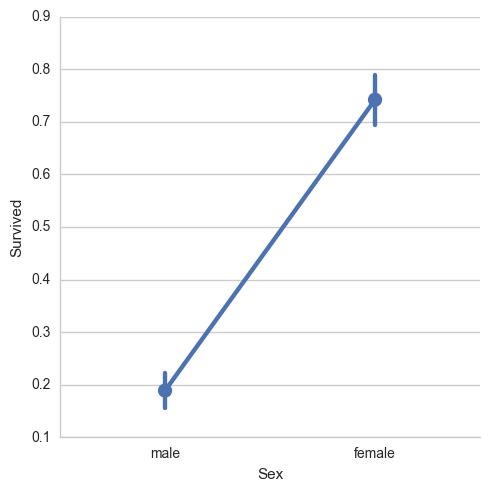

In [11]:
sns.factorplot('Sex','Survived',order=['male', 'female'], data=titanic_df,size=5)

## Calculate the children entrophy 2 : PClass

In [12]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [13]:
class1 = titanic_df[titanic_df.Pclass == 1][['Survived']]
class1_proportion = len(class1) / len(titanic_df)
class2 = titanic_df[titanic_df.Pclass == 2][['Survived']]
class2_proportion = len(class2) / len(titanic_df)
class3 = titanic_df[titanic_df.Pclass == 3][['Survived']]
class3_proportion = len(class3) / len(titanic_df)


Pclass_entropy = Entropy(class1.Survived)*class1_proportion + Entropy(class2.Survived)*class2_proportion + Entropy(class3.Survived)*class3_proportion

print('Pclass Entropy is:{}'.format(Pclass_entropy))

0.62962962963 0.667424660913
0.37037037037 1.43295940728
0.527173913043 0.92364911387
0.472826086957 1.08061846021
0.757637474542 0.400420403207
0.242362525458 2.04476145101
Pclass Entropy is:0.8768768565796353


## Information Garin from Pclass attribute
- smaller information gain than Sex. so this contribues less to the target variable than Sex
- but still it reduces entropy of the entire dataset by 0.08. not a neglectible amount

In [14]:
global_entropy - Pclass_entropy

0.0838310452960116

### for more information about seaborn factorplot [click here](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)
- higher class has better survival rate
- let's visually observe the survival rate of each Pclass

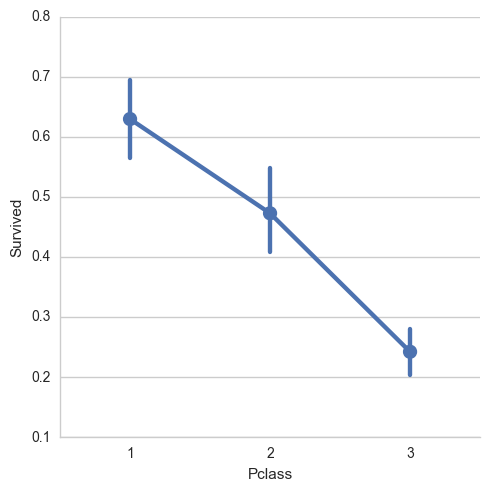

In [15]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

## Calculate the children entrophy 3: SibSp

In [16]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
pd.value_counts(titanic_df['SibSp'].values)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

## let's visually observe the difference in survival rate based on how many siblins and spouse they have

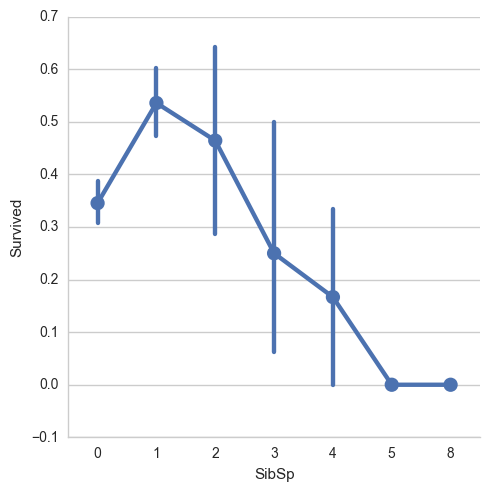

In [18]:
sns.factorplot('SibSp','Survived', data=titanic_df,size=5)
# I guess the percentage is available by simply using factorplot because Survived column have only 0 and 1
# and the average value turns out to be the percentage of survival rate.

- this gives me some idea how I should categorize the values
- I will divide the population into 0, 12, 3458. by intuition

In [19]:
SibSp0 = titanic_df[titanic_df.SibSp == 0][['Survived']]
SibSp0_proportion = len(SibSp0) / len(titanic_df)
SibSp12 = titanic_df[titanic_df.SibSp == 1 | (titanic_df.SibSp == 2)][['Survived']]
SibSp12_proportion = len(SibSp12) / len(titanic_df)
SibSp3458 = titanic_df[(titanic_df.SibSp == 3) |(titanic_df.SibSp == 4) | (titanic_df.SibSp == 5) | (titanic_df.SibSp == 8)][['Survived']]
SibSp3458_proportion = len(SibSp3458) / len(titanic_df)

SibSp_entropy = Entropy(SibSp0.Survived)*SibSp0_proportion + Entropy(SibSp12.Survived)*SibSp12_proportion + Entropy(SibSp3458.Survived)*SibSp3458_proportion 

print('SibSp Entropy is:{}'.format(SibSp_entropy))


0.654605263158 0.6113028929
0.345394736842 1.53368199578
0.535885167464 0.900004210023
0.464114832536 1.10744628989
0.847826086957 0.238159737195
0.152173913043 2.716207034
SibSp Entropy is:0.8999957476075591


## Information Gain from SibSp
- it is the lowest so far.
- 0.06

In [20]:
global_entropy - SibSp_entropy

0.06071215426808785

## Calculate the children entrophy 4: Parch

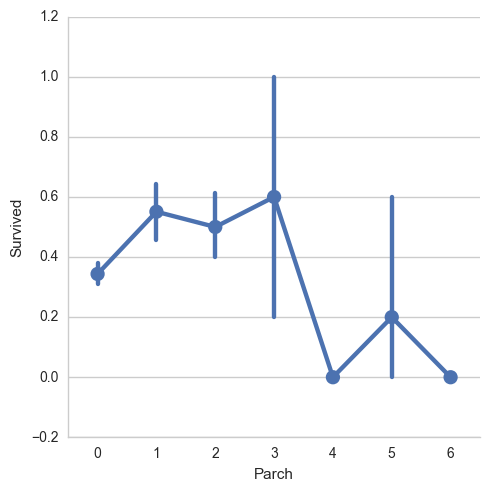

In [21]:
#titanic_df[['Parch','SibSp','Survived']]
sns.factorplot('Parch','Survived', data=titanic_df,size=5)

In [22]:
pd.value_counts(titanic_df['Parch'].values)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
dtype: int64

- this does not look like it's going to give me much insightb
- I thought it was a good idea to sum up SibSp and Parch column so that we can divide the group into Alone and With Family.
- Idea taken from [Kaggle Example](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

## Data Manipulation for Family Attribute

In [23]:
# 1. Create a new column called Family and give value of 0 and 1
#  - add up two columns and name it Family
#  - if the Family value is 0 then leave it at that and if the family value it bigger than 0 then change it to 1

In [24]:
# Creating new column in DataFrame
titanic_df["Family"] = titanic_df['SibSp'] + titanic_df['Parch']

In [25]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [26]:
# if Family value is 0 then keep it zero otherwise make it one
for i in range(len(titanic_df)) :
    if titanic_df['Family'].iloc[i] == 0 :
        titanic_df['Family'].iloc[i] = 0
    else :
        titanic_df['Family'].iloc[i] = 1
        
## Versus

#titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
#titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0
# ==>this is much more efficient way to do this
# ==> .loc is usually followed by a index name but this is a series of true and false
# ==> and in dataframe you can just give a value as if you are assigning it to a single value

C:\Users\t_ohd\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
titanic_df['Family'].unique()

array([1, 0], dtype=int64)

In [28]:
# Drop Sibsp and Parch


In [29]:
titanic_df['Family'].unique()

array([1, 0], dtype=int64)

In [30]:
# Drop Sibsp and Parch
titanic_df.drop(['SibSp','Parch'], axis=1).head(3)
# Now finally data is ready to compare survival rate of Alone passengers and with family passengers


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0


## Time to Visualize
### plots referenced from [Seaborn](http://seaborn.pydata.org/examples/color_palettes.html)
### the bar plot will compare the difference in survival rate based on passengers with and without family

[<matplotlib.text.Text at 0xd48d470>, <matplotlib.text.Text at 0xd491710>]

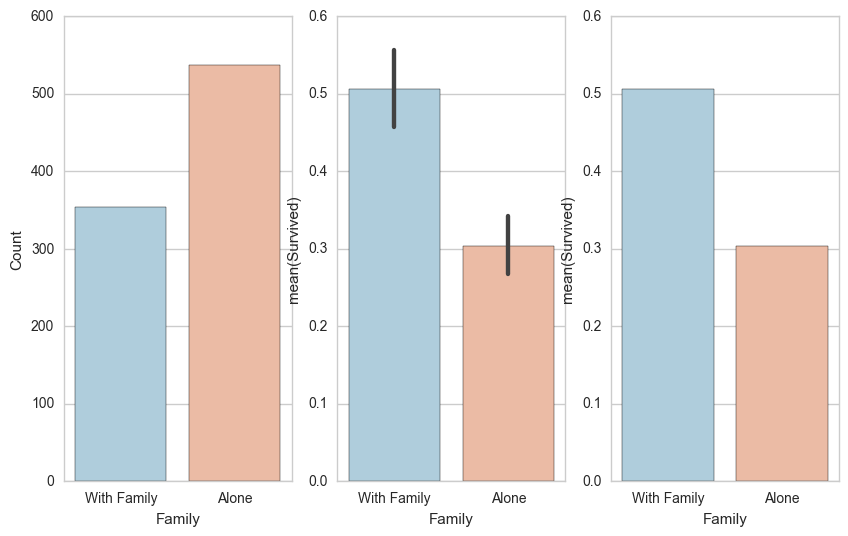

In [32]:
# Set up the matplotlib figure
# (ax1, ax2 ..) : number of graphs
# sharex=True  : this allows me to set xaxis label for one and let it be shared
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(10, 6))

## 1. Count
# countplot : don't put y value. it's just a count
sns.countplot(x='Family', palette="RdBu_r", ax=ax1, data=titanic_df,order=[1,0])
ax1.set_ylabel("Count")

## 2. Mean
# barplot
sns.barplot(x='Family', y='Survived', palette="RdBu_r",order=[1,0], data=titanic_df, ax=ax2)

#Q : what is that black vertical bar doing?
# got my answer from 
# [Kaggle Example](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

## 3. Mean
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()


# since I am using mean, it does not have std.
sns.barplot(x='Family', y='Survived', palette="RdBu_r",order=[1,0], data=family_perc, ax=ax3)

# set X label
ax1.set_xticklabels(["With Family","Alone"], rotation=360)

## Calculate the children entrophy 5: Family

In [266]:
wFamily = titanic_df[titanic_df.Family == 1][['Survived']]
wFamily_proportion = len(class1) / len(titanic_df)
woFamily = titanic_df[titanic_df.Pclass == 2][['Survived']]
woFamily_proportion = len(class2) / len(titanic_df)

Family_entropy = Entropy(wFamily.Survived)*wFamily_proportion + Entropy(woFamily.Survived)*woFamily_proportion

print('Family Entropy is:{}'.format(Family_entropy))

0.505649717514 0.983789772819
0.494350282486 1.01639443825
0.527173913043 0.92364911387
0.472826086957 1.08061846021
Family Entropy is:0.4484712414531313


## Information Gain from Family attribute

- Information Gain : 0.51
- Significantly lowers the entropy of the dataset!

In [268]:
global_entropy - Family_entropy

0.5122366604225157

In [95]:
### a natural measure of impurity for numeric values is variance. 
### if the set has all the same values for the numeric target variable , then the set is pure and the variance is zero.
### 

# Continuous Variable
- Insight from [Kaggle Example](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

In [459]:
titanic_df.groupby(by=['Age'])['Survived'].sum()

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      5
2.00      3
3.00      5
4.00      7
5.00      4
6.00      2
7.00      1
8.00      2
9.00      2
10.00     0
11.00     1
12.00     1
13.00     2
14.00     3
14.50     0
15.00     4
16.00     6
17.00     6
18.00     9
19.00     9
20.00     3
20.50     0
21.00     5
22.00    11
23.00     5
         ..
44.00     3
45.00     5
45.50     0
46.00     0
47.00     1
48.00     6
49.00     4
50.00     5
51.00     2
52.00     3
53.00     1
54.00     3
55.00     1
55.50     0
56.00     2
57.00     0
58.00     3
59.00     0
60.00     2
61.00     0
62.00     2
63.00     2
64.00     0
65.00     0
66.00     0
70.00     0
70.50     0
71.00     0
74.00     0
80.00     1
Name: Survived, dtype: int64

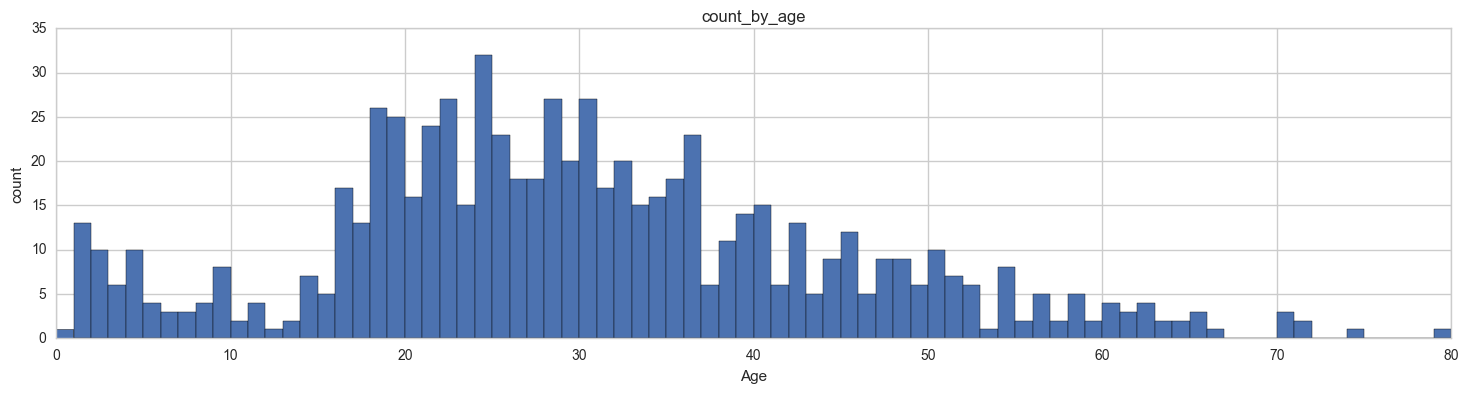

In [42]:
# Let's see how the population proportion looks like
# round up all Age values
titanic_df['Age'] = titanic_df['Age'].round()
# there are quite a few NaNs. we already saw from .info that there are many.
titanic_df['Age'].dropna().astype(int).hist(bins=80, grid=True, figsize=[18,4])
plt.title('count_by_age')
plt.xlabel('Age')
plt.ylabel('count')

## as_index : boolean, default True

## [Pandas Groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
-  DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

-    For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output


## dealing with missing data
### I just simply dropped the missing data
### below graph will give a good understading about where to draw a line to categorize the continuous variable into categorical variable based on survival rate.

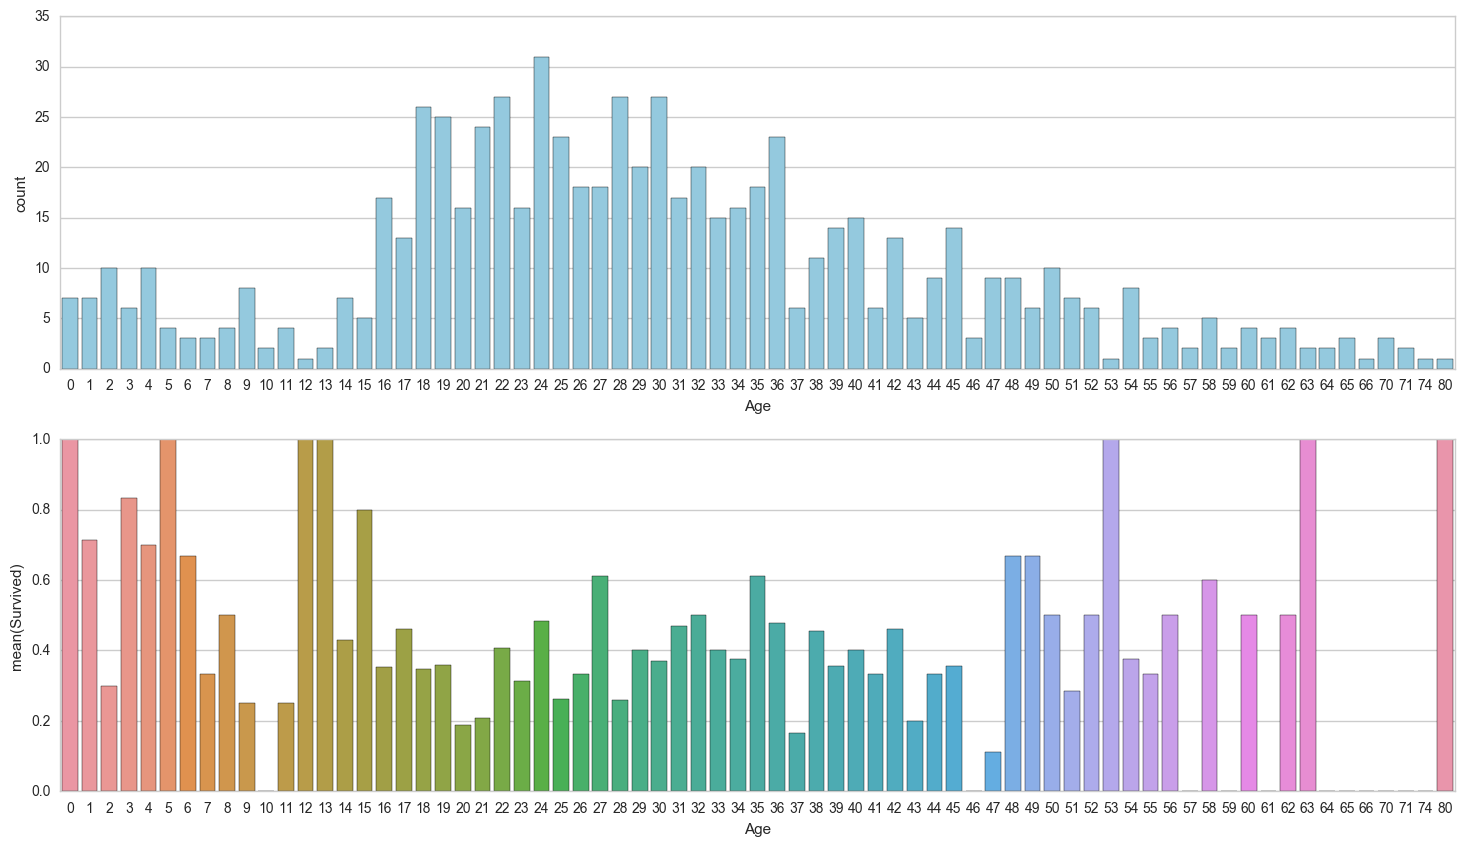

In [36]:
## Survival Rate
titanic_age = titanic_df[["Age","Survived"]].dropna().astype(int).groupby(['Age'], as_index=False).mean()
#dropna() : drop all the na
#astype(int) : all data types to int
#groupby
#Q as_index=False : only after I use this, the graph starts to work

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

## Count
#titanic_df['Age'].dropna().astype(int).hist(bins=80, grid=True, figsize=[18,4]
titanic_age_count = titanic_df[['Age','Survived']].dropna().astype(int)
#sns.countplot(x='Age', ax=ax1,palette="Blues_d", data=titanic_age_count)
sns.countplot(x='Age', ax=ax1,color="skyblue", data=titanic_age_count)


sns.barplot(x='Age', y='Survived',ax=ax2, data=titanic_age)
#sns.barplot(x='Family', y='Survived', palette="RdBu_r",order=[1,0], data=titanic_df, ax=ax2)

## Calculating Entropy 

- Children : 0~15
- Adult : 16~

In [367]:
Children = titanic_df[(titanic_df.Age <= 15)][['Survived']]
Children_proportion = len(Children) / len(titanic_df)
Adult = titanic_df[(titanic_df.Age > 15)][['Survived']]
Adult_proportion = len(Adult) / len(titanic_df)

Children_entropy = Entropy(Children.Survived)*Children_proportion + Entropy(Adult.Survived)*Adult_proportion 
print('Children Entropy is:{}'.format(Children_entropy))


0.590361445783 0.760329587232
0.409638554217 1.2875765901
0.618066561014 0.694165881233
0.381933438986 1.38860685875
Children Entropy is:0.7703846245542734


## Information Gain from Age

In [366]:
global_entropy - Children_entropy

0.18646237865652793

## Calculate the children entrophy 6: Fare

In [373]:
titanic_df[['Fare','Survived']].head()

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


In [443]:
titanic_df['Fare'] = titanic_df['Fare'].round().astype(int)

titanic_fare = titanic_df[['Fare']]
titanic_fare_surv = titanic_df[['Fare','Survived']].groupby(['Fare'], as_index=False).mean()


## as_index=False : EUREKA!!! if I set this as True then 'Fare' is index
## if I set this as false, then 'Fare' becomes just another column

titanic_df.head()
titanic_fare_surv.head()

,Fare,Survived
0,0,0.066667
1,4,0.000000
2,5,0.000000
3,6,0.000000
4,7,0.169231


## Below two charts will show how the Fare is proportioned and also give a rough idea how to divde the semi continuous fare variable into categorical varible based on survivate rate

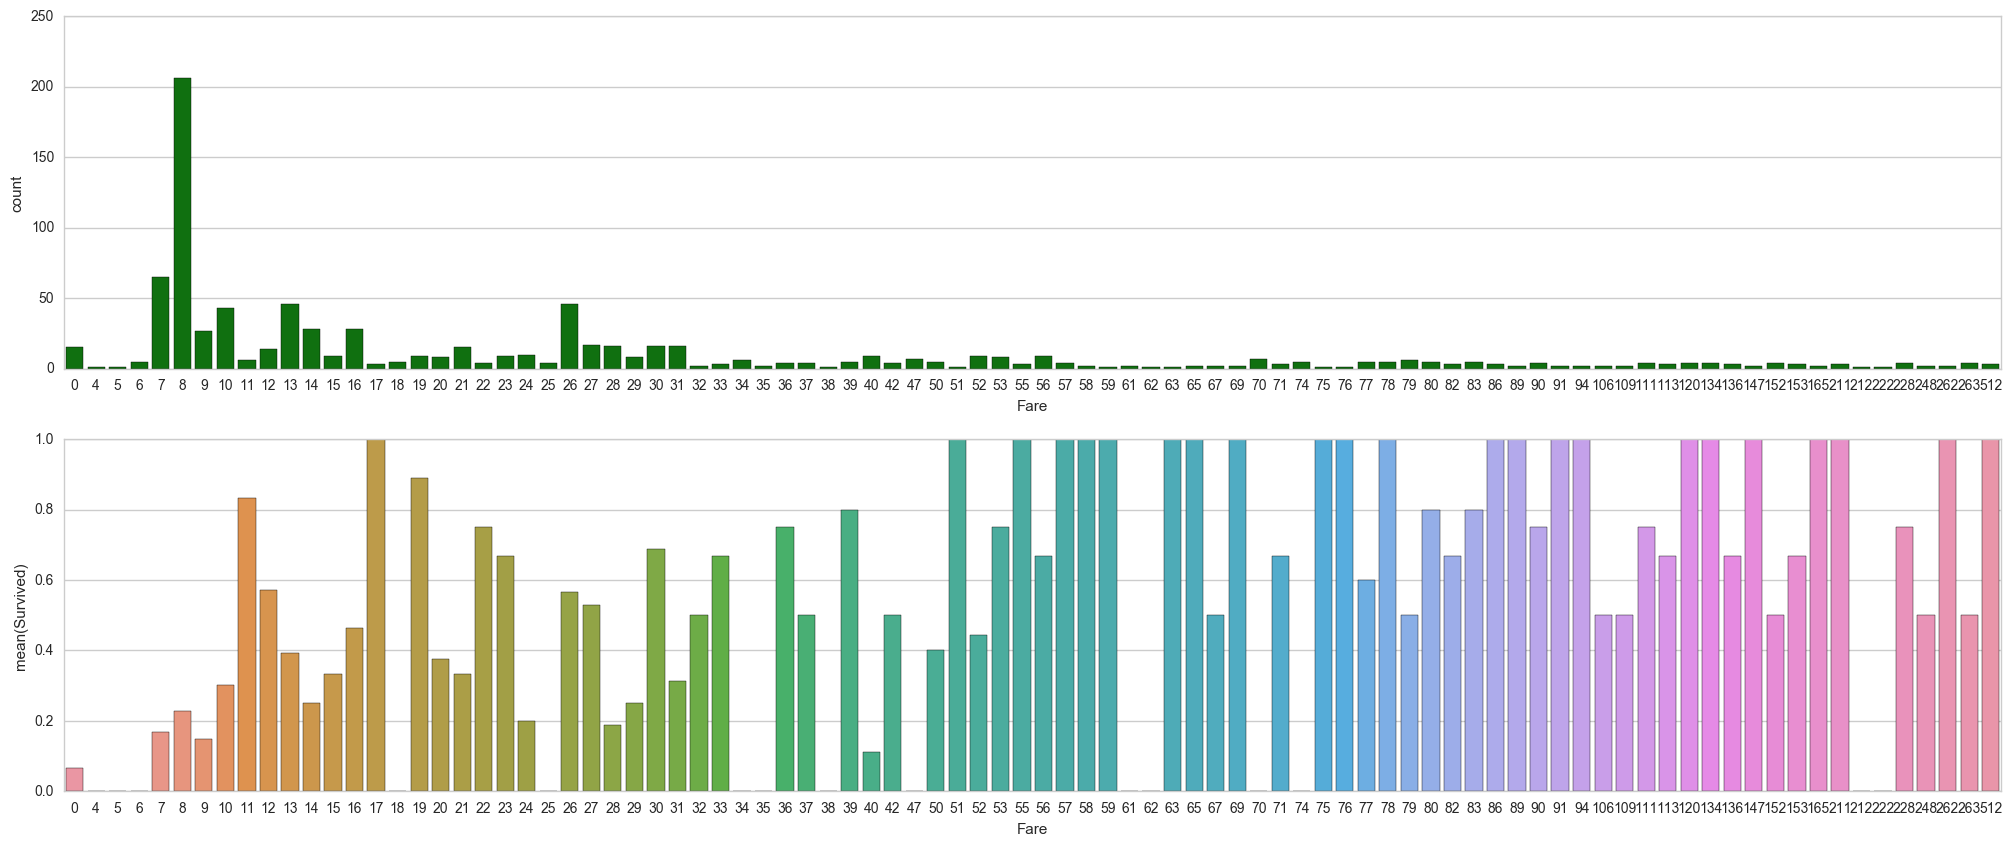

In [471]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
#matplotlib
sns.countplot(x='Fare', ax=ax1, data=titanic_fare, color='green')
sns.barplot(x='Fare', y='Survived', ax=ax2, data=titanic_fare_surv)

# Divide the Fare into three Categories
- by trial and error, this seems to be the optimal divide

In [472]:
low_fare = titanic_df[titanic_df.Fare < 10][['Survived']]
low_fare_proportion = len(low_fare) / len(titanic_df)
mid_fare = titanic_df[(titanic_df.Fare >= 10) & (titanic_df.Fare<51)][['Survived']]
mid_fare_proportion = len(mid_fare) / len(titanic_df)
high_fare = titanic_df[(titanic_df.Fare>=51)][['Survived']]
high_fare_proportion = len(high_fare) / len(titanic_df)

Fare_entropy = Entropy(low_fare.Survived)*low_fare_proportion + Entropy(mid_fare.Survived)*mid_fare_proportion + Entropy(high_fare.Survived)*high_fare_proportion

print('Fare Entropy is:{}'.format(Fare_entropy))

0.803125 0.316303545693
0.196875 2.34464817139
0.587378640777 0.767637289909
0.412621359223 1.27710959105
0.685534591195 0.544698630507
0.314465408805 1.66902676551
Fare Entropy is:0.8694760826902925


## Information Grain from Fare

In [473]:
global_entropy - Fare_entropy

0.09123181918535439

In [435]:
print(low_fare.mean())
print(mid_fare.mean())
print(high_fare.mean())

Survived    0.196875
dtype: float64
Survived    0.412621
dtype: float64
Survived    0.685535
dtype: float64


## Visualize the difference

In [436]:
def categorize_fare(df):
    if df < 10:
        df = "Low"
    elif df < 51:
        df = "Mid"
    else:
        df = "High"
    return df

In [437]:
# adding column into a dataframe
titanic_df[["Fare_cat"]] = titanic_df[["Fare"]].applymap(categorize_fare)

In [452]:
titanic_fare_cat = titanic_df[["Fare_cat","Survived"]].groupby(["Fare_cat"], as_index=False) #.mean()
# groupby and .mean has only been necessary to remove the vertical bar line.

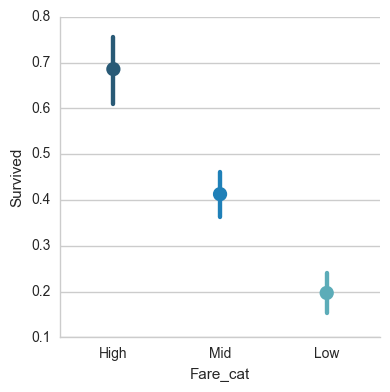

In [464]:
# Draw a pointplot to show pulse as a function of three categorical factors
#g = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=df,
                   #capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
#g.despine(left=True)

# why does the below two graphs different 
#sns.factorplot(x="Fare_cat", y="Survived", data=titanic_fare_cat, order = ['High', 'Mid', 'Low'],palette="YlGnBu_d", size=4, aspect=.75)
sns.factorplot(x= "Fare_cat", y= "Survived", data=titanic_df, order = ['High', 'Mid', 'Low'],palette="YlGnBu_d", size=4, aspect=1)

#Q# why does 

# Comparing Information Gain from five attributes

In [474]:
print( "IG from Age is {}".format(global_entropy- Children_entropy))
print( "IG from Family is {}".format(global_entropy- Family_entropy))
print( "IG from Pclass is {}".format(global_entropy- Pclass_entropy))
print( "IG from Sex is {}".format(global_entropy- Sex_entropy))
print( "IG from Fare is {}".format(global_entropy- Fare_entropy))

IG from Age is 0.19032327732137355
IG from Family is 0.5122366604225157
IG from Pclass is 0.0838310452960116
IG from Sex is 0.2176601066606142
IG from Fare is 0.09123181918535439


# Conclusion

- based on the Information Gain, the order of attributes that affect the target value that most is
- `Family` > `Sex` > `Age` > `Fare` > `Pclass`
- Having a family, being a vessel in terms of sex and age contributed the most in terms of survival.
- Fare and Pclass contributed less than all the human values in terms of survival. 
- in conclusion, still people are good
- I do not see any specific limitations on dataset
- I would like to further create a machine learning model and predict whether a given new passenger is likely to survive or not.